In [1]:
#
from datetime import datetime
#target_code = '033340'
#date_from = '1995-5-2'
date_from  = '2015-1-1'
today=  datetime.now().strftime('%Y-%m-%d')
today

'2021-03-03'

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 쌍방울 코드 검색하기
target_name = "SGC이테크건설"
df = pd.read_csv("marcap/data/marcap-2021.csv.gz")
target_code = df[df["Name"] == target_name]["Code"].iloc[0]
target_code

'016250'

In [4]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = marcap_data(date_from, today, target_code)

In [6]:
latest_stocks = df.iloc[-1]['Stocks']
latest_stocks

1581383.0

In [7]:
df['Adj Close'] = df['Close'] / latest_stocks * df['Stocks']

<AxesSubplot:xlabel='Date'>

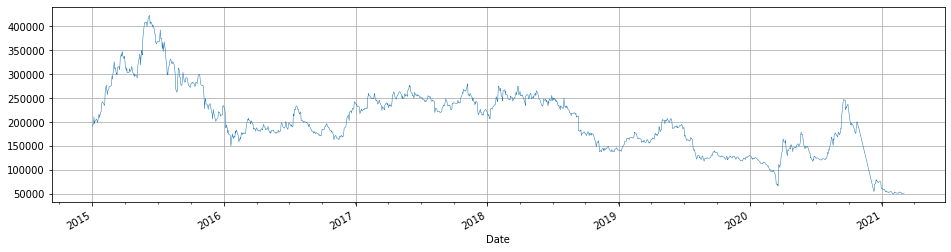

In [8]:
df['Adj Close'].plot()

In [9]:
df['Adj Close'].iloc[-1]

50900.0

In [10]:
df.iloc[-1]

Code                  016250
Name                SGC이테크건설
Market                KOSDAQ
Dept                   우량기업부
Close                50900.0
ChangeCode                 1
Changes                200.0
ChagesRatio              NaN
Open                 50800.0
High                 51300.0
Low                  50300.0
Volume                3362.0
Amount           170791300.0
Marcap         80492394700.0
Stocks             1581383.0
MarketId                 KSQ
Rank                    1758
ChangesRatio            0.39
Adj Close            50900.0
Name: 2021-03-03 00:00:00, dtype: object

In [11]:
import scipy.stats

In [12]:
c_min = df['Adj Close'].min()
c_max = df['Adj Close'].max()
c_mean = df['Adj Close'].mean()
c_std = df['Adj Close'].std()

c_current = df['Adj Close'].iloc[-1]

c_norm = scipy.stats.norm(c_mean, c_std)
print(c_min, c_max, c_mean, c_current, c_norm.cdf(c_current))

50000.00000000001 422996.83251938334 203461.97273499827 50900.0 0.013114130711021769


In [13]:
c_mean/c_current

3.997288265913522

<AxesSubplot:xlabel='Date'>

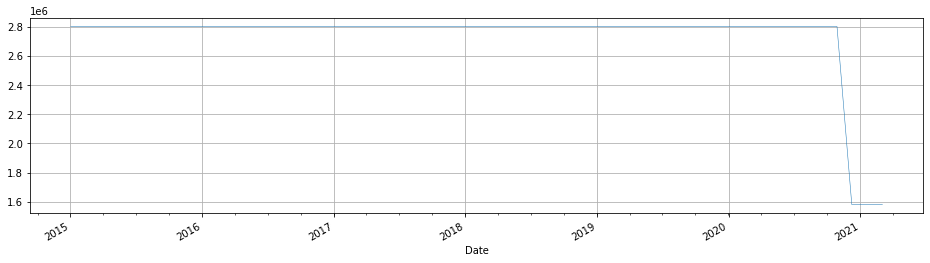

In [14]:
df['Stocks'].plot()